## Lets look at the data

In [31]:
function read_data_file()
  data = readdlm("mystery_planet2.txt")
  time = data[:,1]
  flux = data[:,2]
  err = data[:,3]
  return (time, flux, err)
end

read_data_file (generic function with 2 methods)

In [35]:
time, flux, err = read_data_file();

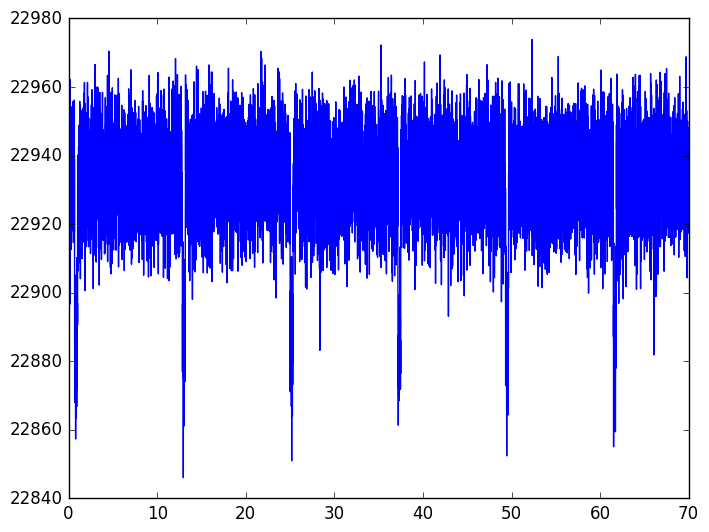

In [33]:
plot(time, flux);

## Find the period

In [67]:
period = 0
prev = Inf
sumslist = []
for p in linspace(5, 15, 1000)
    sums = 0
    data_temp = zeros(Float64, length(time), 2)
    data_temp[:,1] = mod(time,p)
    data_temp[:,2] = flux
    sorted = sortrows(data_temp, by=x->x[1])

    for i=2:length(time)
        sums += (sorted[i,2] - sorted[i-1,2])^2
    end
    push!(sumslist, sums)
    
    if sums < prev
        prev = sums
        period = p
    end
end
println(period)

12.167167167167166


## Plot the period

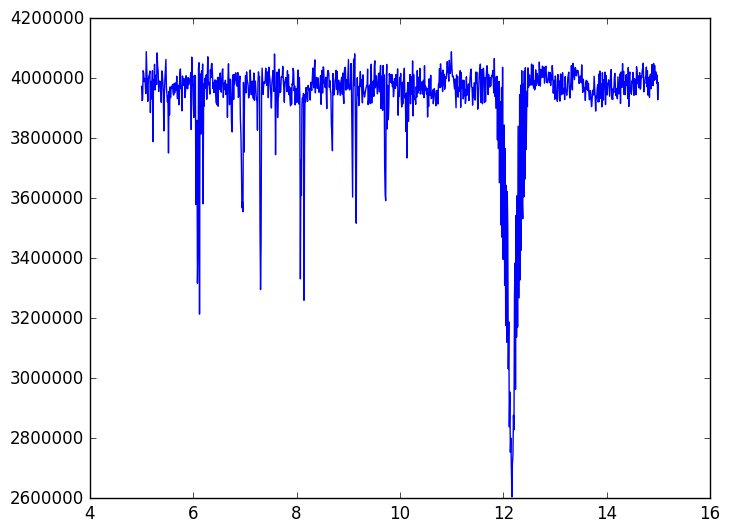

In [69]:
plot(linspace(5, 15, 1000), sumslist);

## Phase fold the light curve to see the transit

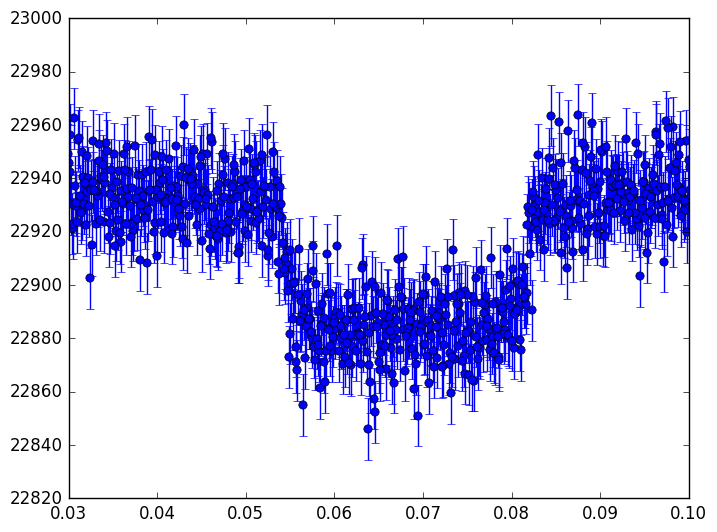

In [70]:
foldTimes = time / period   # divide by period to convert to phase
foldTimes = foldTimes % 1   # take fractional part of phase only (i.e. discard whole number part)

# plot folded lightcurve
errorbar(foldTimes,flux,yerr=err,linestyle="none",marker="o")
xlim(0.03,0.1)
show()
